In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="white", font_scale=1.5)


In [2]:
data_folder = "../model/experiment/output"
df = pd.read_csv(os.path.join(data_folder, 'pilot_3_point_alpha8_cost0.1_120.csv'))
df['total_ex'] = df['heads'] + df['tails']
df['mean'] = df['heads'] / (df['heads'] + df['tails'])
# df['trial'] = df['block_type'] + df['trial_num'].apply(lambda x: str(x))
df.loc[(df['student_class'] == 'A') | (
    df['student_class'] == 'B'), 'student_experience'] = 'less'
df.loc[(df['student_class'] == 'C') | (
    df['student_class'] == 'D'), 'student_experience'] = 'more'
df['theta'] = df['true_theta'] # for plotting purposes
df


,alpha,costWeight,block_type,trial_num,true_theta,student_class,heads,tails,total_ex,mean,student_experience,theta
0,8,0.1,nonSeqFull,0,0.2,B,0,12,12,0.000000,less,0.2
1,8,0.1,nonSeqFull,0,0.2,D,0,19,19,0.000000,more,0.2
2,8,0.1,nonSeqFull,0,0.5,A,3,0,3,1.000000,less,0.5
3,8,0.1,nonSeqFull,0,0.5,C,6,0,6,1.000000,more,0.5
4,8,0.1,nonSeqFull,0,0.8,A,7,0,7,1.000000,less,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4315,8,0.1,seqFeedback,1,0.5,C,5,0,5,1.000000,more,0.5
4316,8,0.1,seqFeedback,0,0.8,B,9,0,9,1.000000,less,0.8
4317,8,0.1,seqFeedback,1,0.8,B,5,2,7,0.714286,less,0.8
4318,8,0.1,seqFeedback,0,0.8,D,16,0,16,1.000000,more,0.8


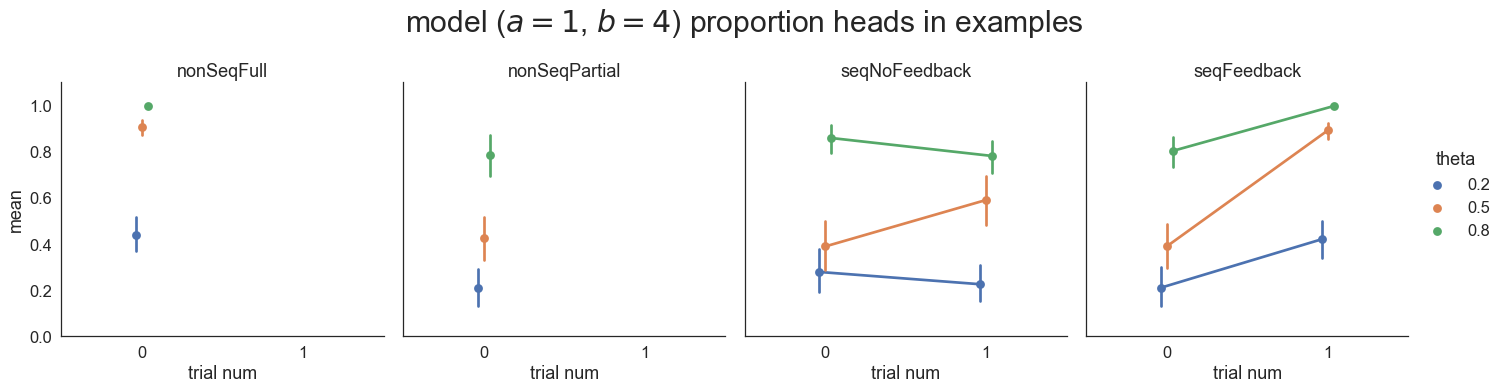

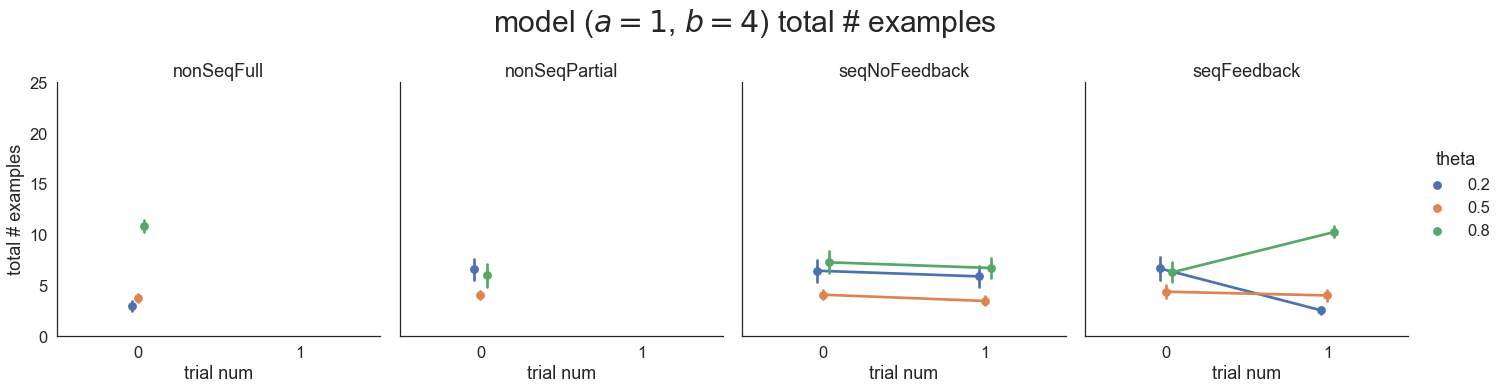

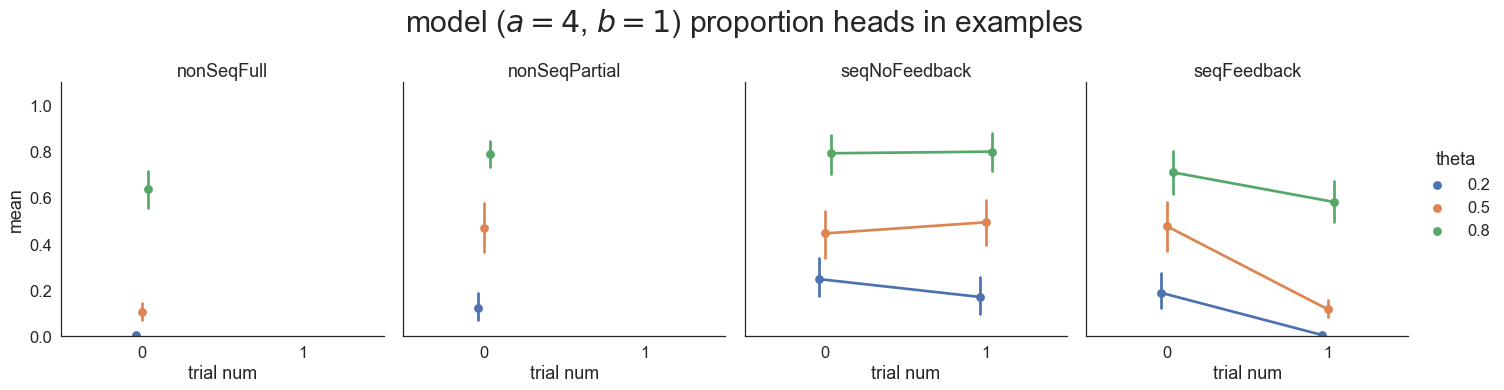

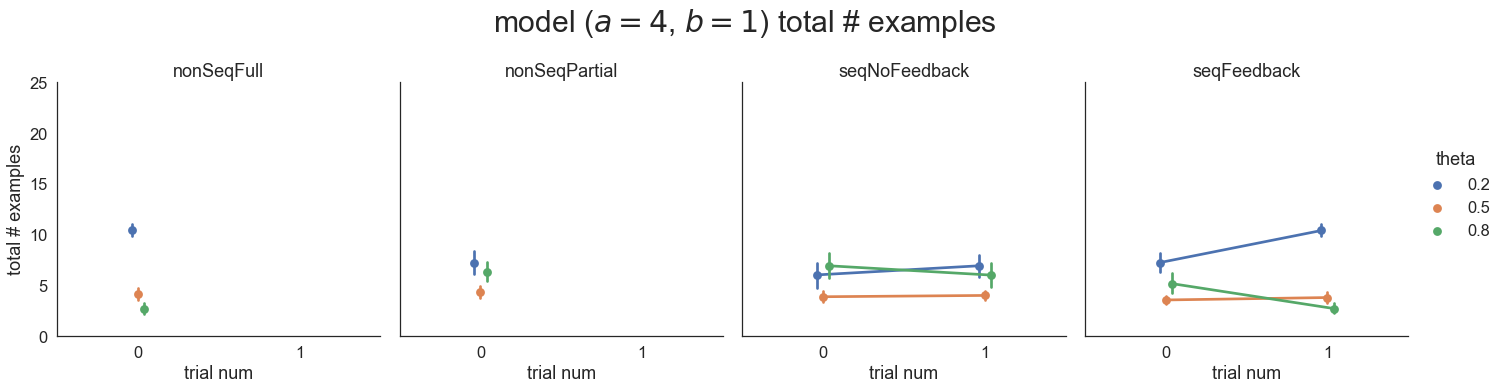

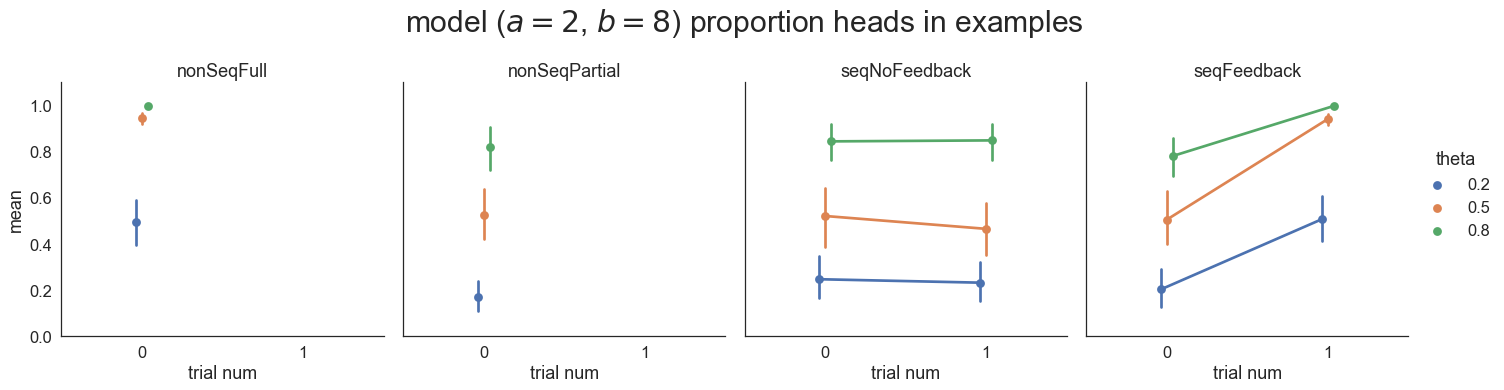

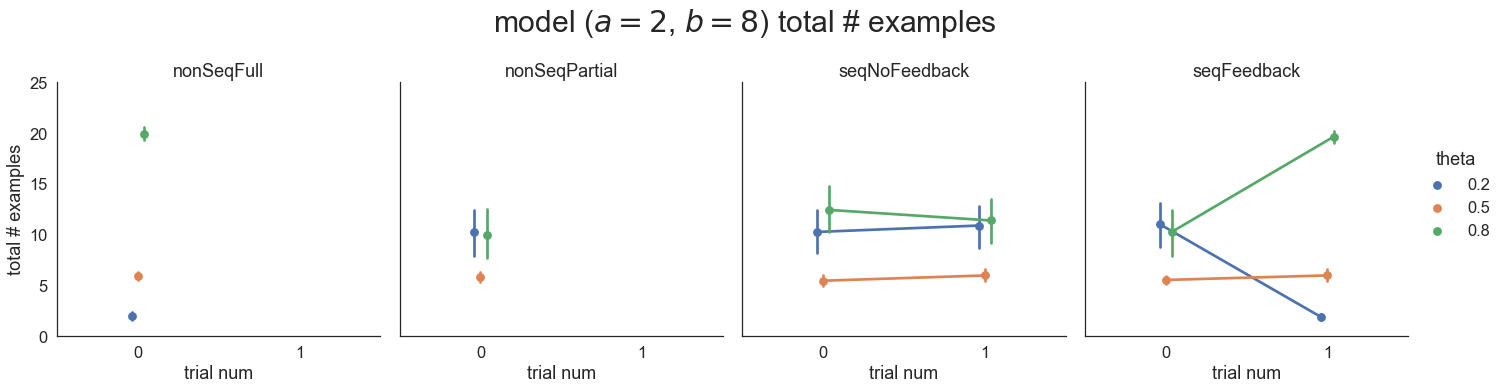

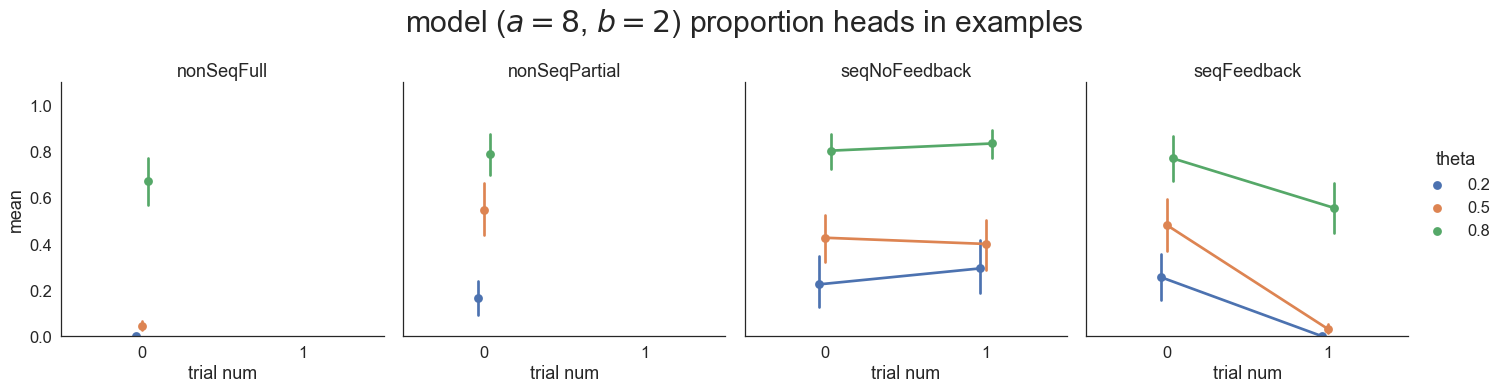

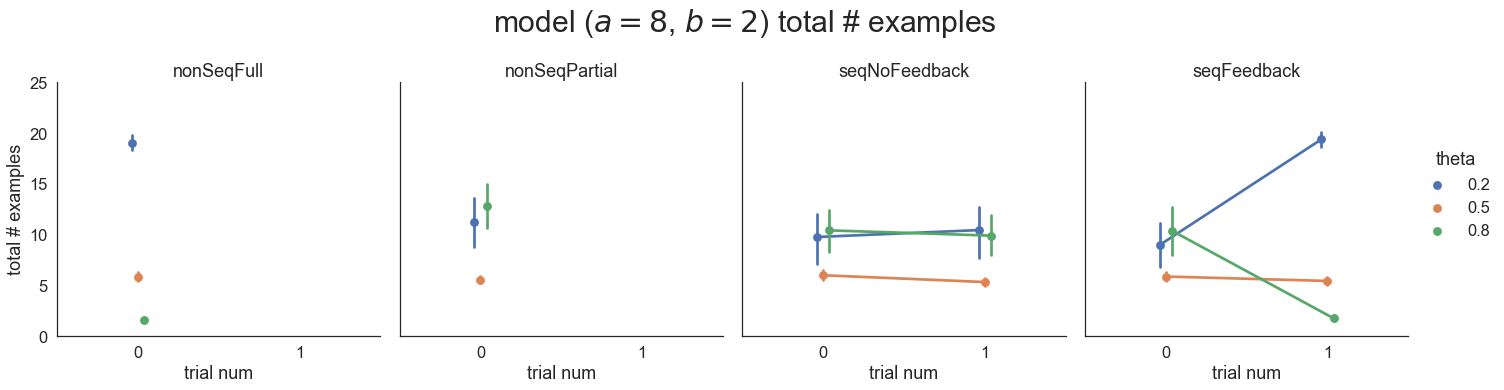

In [3]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=2$, $b=8$)",
    'D': "($a=8$, $b=2$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'])
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle("model " + hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'])
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 25))
     .set_titles("{col_name}")
     .figure.suptitle("model " + hypers + " total # examples", y=1.1, size=30)
     )


Look at the actual points

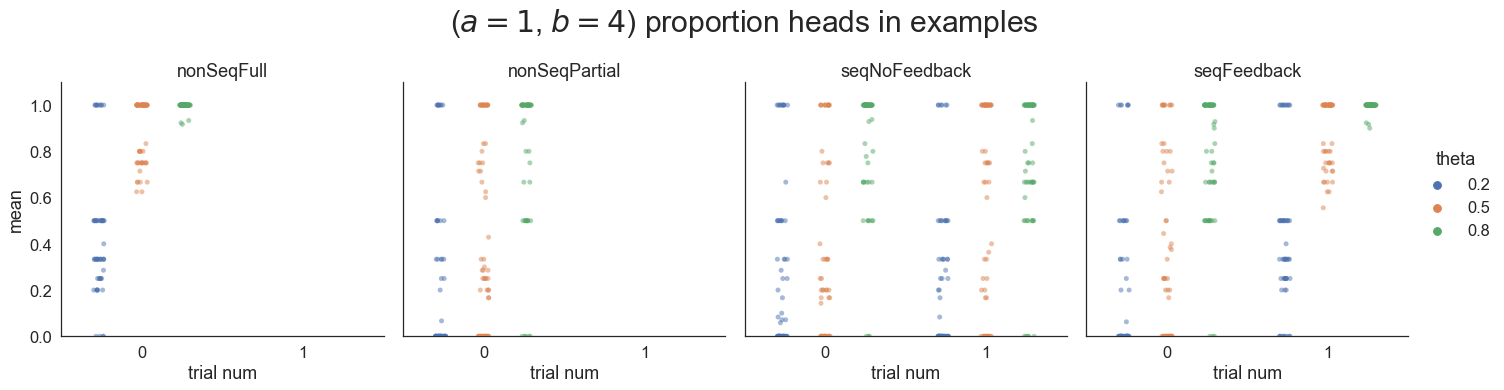

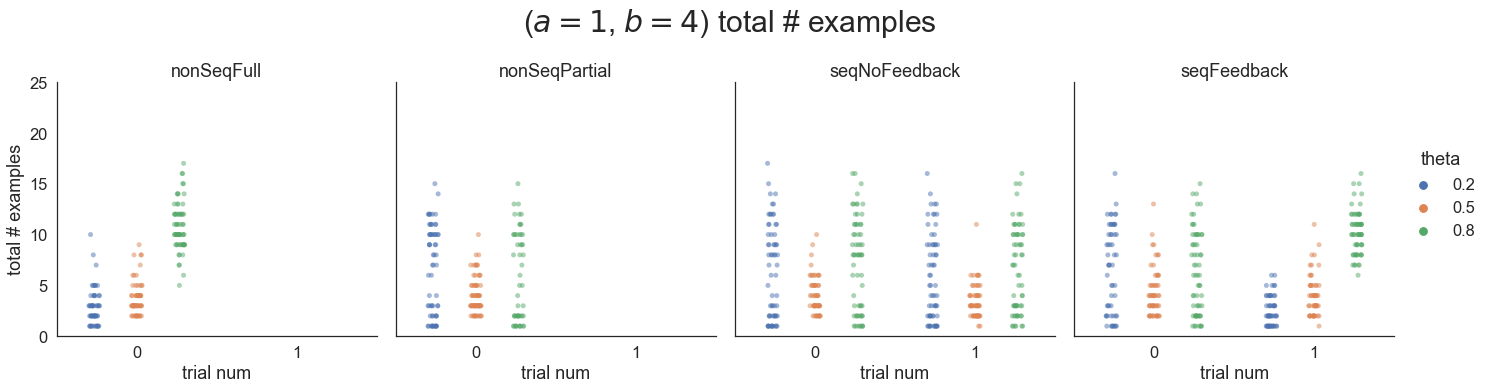

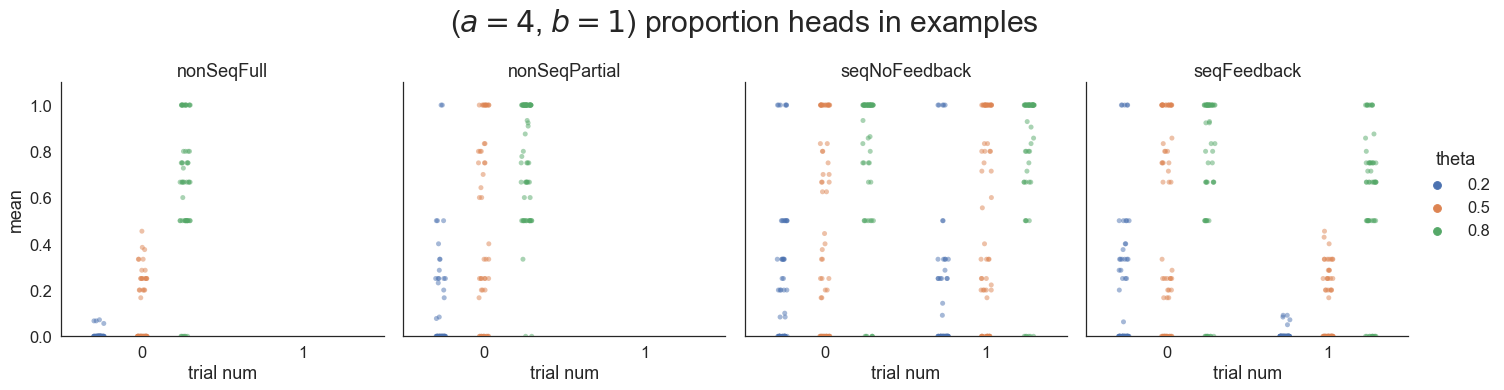

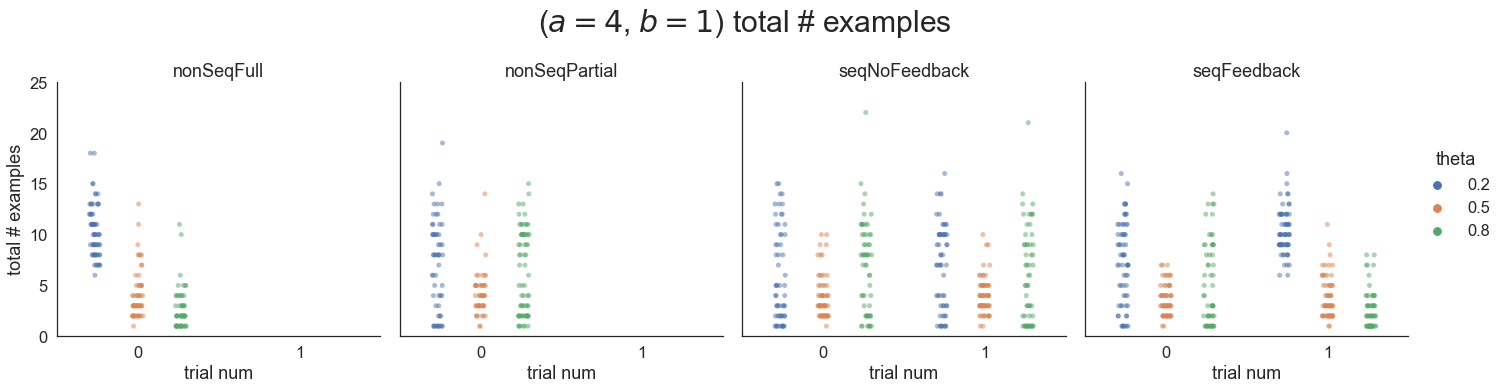

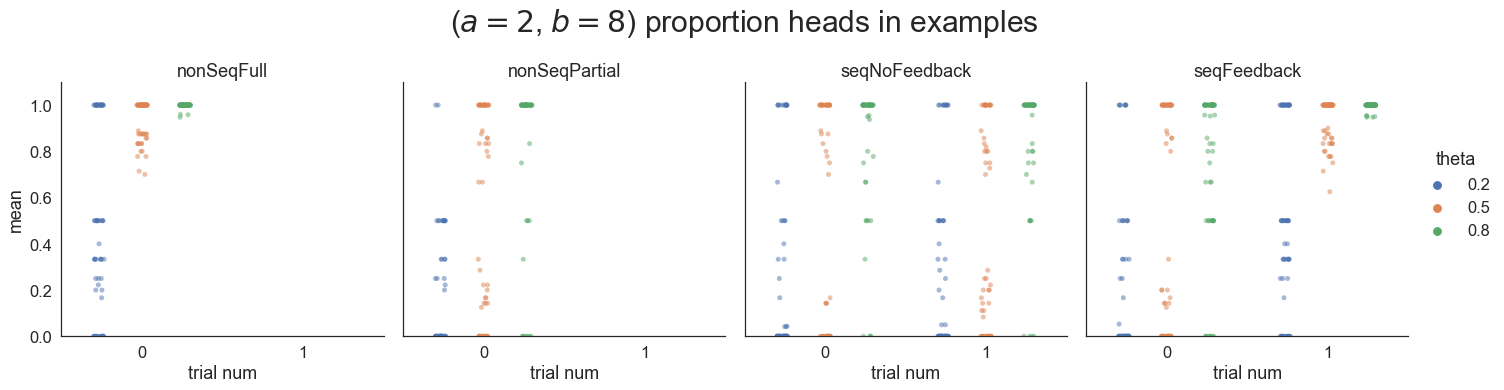

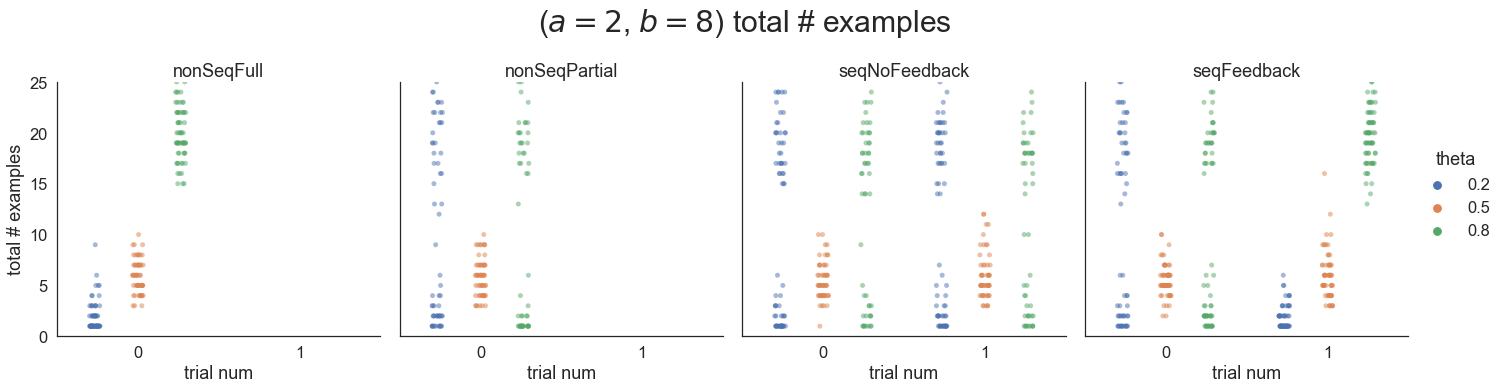

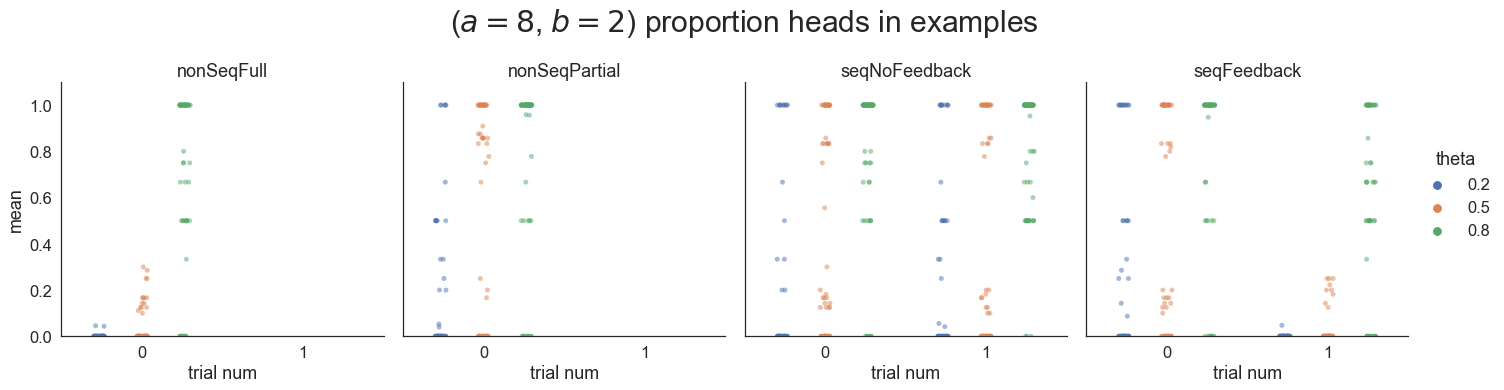

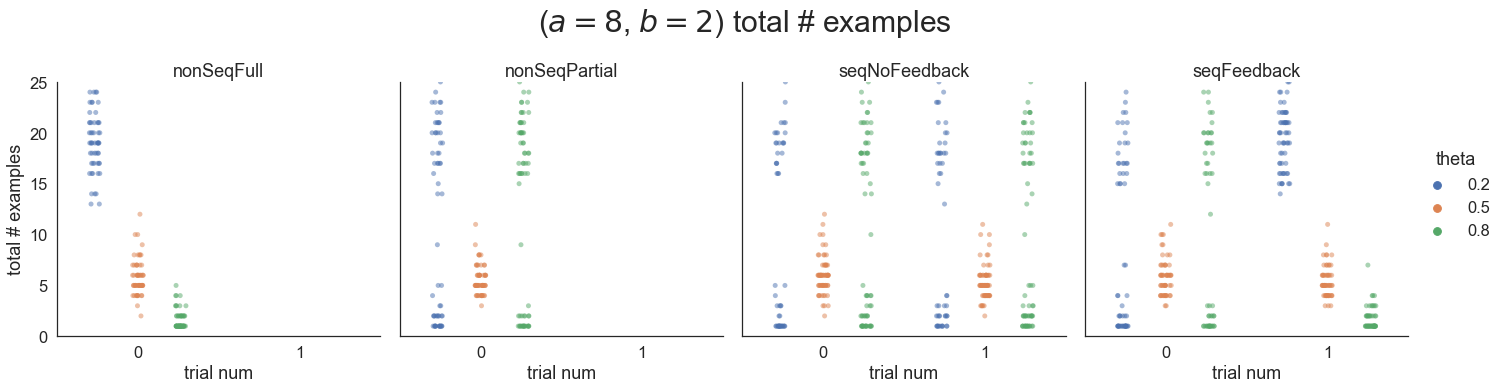

In [4]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=2$, $b=8$)",
    'D': "($a=8$, $b=2$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle(hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 25))
     .set_titles("{col_name}")
     .figure.suptitle(hypers + " total # examples", y=1.1, size=30)
     )
